## Data preparation

In [1]:
#Importing the required packages for the assignment.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report



In [2]:
#we load and store the dataset, row at index 1 contains the features names
data_2 = pd.read_csv("data.csv", header=1)
data = pd.DataFrame(data_2)
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


We further inspect the dataset to get a better idea about the feature nature and its distirbution. 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
data.describe().T[['count', 'mean', 'std', 'min', 'max']]

,count,mean,std,min,max
ID,30000.0,15000.500000,8660.398374,1.0,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,3.0
AGE,30000.0,35.485500,9.217904,21.0,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,8.0


Overall, we observe 23 predictive features (ID is excluded from count as it does not contain valuable information) and a binary predictive feature - default payment next month.

### Dataset inspection discussion:
LIMIT_BAL - really large std indicates possible extreme credit values. 

EDUCATION - number of categories does not match the description of the dataset (7 categories present instead of 4). Assumption 1 - Data could be incorrectly recorded. Assumption 2 - The order is mistreated (e.g. start from 0 and end with 6, meaning additional categories were added). The problem is that data is imbalanced with these categories, e.g. category 0 is represented only with 14 observations. We will assume that the new categories were introduced as an extension of category other, and hence we will not perform additional transformations.

Marriage - same problems as for education, additional category 0 is present with just 54 observations, perhaps 0 represents missing values. We proceed with the same assumption as for education.

PAY_0 - PAY_6: Overall, we can see that data observations do not match the description of the dataset fully, this pattern seems fundamental for the overall dataset, and we will assume that those were mandatory transformations and hence will not manipulate the features for this assignment assuming that these transformations do not change the theoretical relationship between features and the target variable.

Overall inspection of the dataset reveals that data is significantly imbalanced. The skewness of distributions can be noted from the observation of the means and std values. Furthermore, the appearance of the dataset differs from the available description in the .txt file. For this assignment, we will assume that these new manipulations were done intentionally. Default rates, in general, are pretty high for this dataset, which could be potentially explained by the historical setting with a financial crisis in 2007.

### Creating dummies for further analysis

To proceed with the classification assignment we would need to transform categorical data into dummies variables with number of dummy variables per dimension = number of categories within the feature. Dummy variables are created using the pandas function 'pd.get_dummies' for the categorical variables of the dataset.
We store this new dataset with dummy created in a new variable.

In [5]:
data_1 = pd.get_dummies(data, columns=['SEX','EDUCATION','MARRIAGE'])


We extract the target variable - 'default payment next month' from the dataset and assign it to the test_variable object. 
We drop the ' ID ' feature from the target_variables that we will use in our model as it does not convey any information on the target variable.

In [6]:
#data without column ID
test_variable = data_1['default payment next month'].tolist()
target_variables = data_1.drop(columns=['default payment next month', 'ID'])
target_variables.columns


Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_1', 'SEX_2', 'EDUCATION_0',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3'],
      dtype='object')

### Models - Features scaling

### KNNClassifier

In [7]:
X_train, X_test, y_train, y_test = train_test_split(target_variables, test_variable, random_state=0)

We need separate the training and test sets to evaluate the supervised model we will build after the preprocessing.

#### StandardScaler

The StandardScaler ensures that for each feature the mean is 0 and the variance is 1.
The scaler is fit on the training data.
To scale the training data, we use the transform method of the scaler.

To apply the KNN Classifier, we also need to transform the test set, calling the transform method on it.


We use GridSearchCV to find an optimal value for the “number of neighbors” n neighbors.


For Knn GridSearch_CV hyperparameter tuning, we set up the following parameters for an optimum number of neighbours searches: (1, 30, 4). This yielded the highest accuracy after repeated experiments of 0.1595 The number of neighbours the GridSearch produced is 29.
CV = 5 was chosen as higher CV did not change search results (runtime optimization).

In [8]:
#Pipeline for KNNClassifier using StandardScaler()

knn_pipe_ss = Pipeline([
    ('StandardScaler', StandardScaler()),
    ('clf', KNeighborsClassifier())])
param_grid_ss = {'clf__n_neighbors': range(1, 30, 4)}
grid_knn_ss = GridSearchCV(knn_pipe_ss, param_grid_ss, cv=5)

grid_knn_ss.fit(X_train, y_train)
print(grid_knn_ss.best_params_)
print(grid_knn_ss.score(X_test, y_test))
y_pred = grid_knn_ss.predict(X_test)



{'clf__n_neighbors': 29}
0.806


We noticed that for the scaled data, the accuracy is 0.806 and the selected number of neighbours is 29.

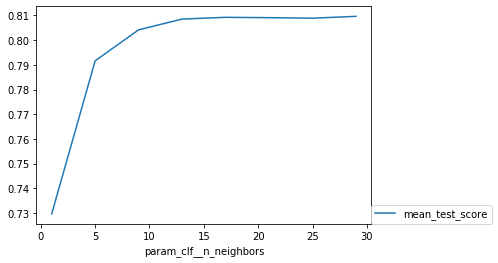

In [9]:
#Visualising n change impact
scores = pd.DataFrame(grid_knn_ss.cv_results_)
scores
scores.plot(x='param_clf__n_neighbors', y=['mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

From this graph we can see that after around 13 neigbours the model performance doesn't improve too much. Grid search indicated that the value of 29 neigbours is the optimal value for best model performance. We also tested grid search with a range above 50, but the optimal was still 29. We can assume that after 29 the model performance will drop with more neihbours as the model may start overfitting.

In [10]:
print(classification_report(y_test, y_pred, labels=[0, 1], digits=6))

              precision    recall  f1-score   support

           0   0.822729  0.958589  0.885478      5868
           1   0.633484  0.257353  0.366013      1632

    accuracy                       0.806000      7500
   macro avg   0.728107  0.607971  0.625746      7500
weighted avg   0.781550  0.806000  0.772443      7500



As specified in the description, the values refer to Default = 1, No default = 0.
For StandardScaler, we notice that precision, recall, f1-score have very high performance when it comes to predicting non-default customers. This cannot be said regarding the prediction on defaulted customers, where the performance of the model is very low. This is due to the unbalance of the data, as confirmed by the support (indicating many data points relate to non-default rather than default).

The accuracy is the number of correct predictions (TP and TN) divided by the number of all samples. The value of 0.806 looks relatively high meaning that the KNN performs well in predicting whether the customer defaulted or not. This will have to be compared to the scaled data using MinMax and unscaled data.

Macro average returns the average without considering the proportion for each label in the dataset. Weighted average returns the average considering the proportion for each label in the dataset.

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[5625,  243],
       [1212,  420]])

The output of confusion_matrix is a two-by-two array, where the rows correspond to the true classes and the columns correspond to the predicted classes.

The model using Stardard scaled data correctly predicts 5625 customers as non-default. The True Positives (Default customers) are much lower (420), confirming our statement above that the model does not perform well in predicting default customers.
The model does not perform well regarding FN, which are the customers the model predicted would not default, while they did default.

####  MinMaxScaler

The MinMaxScaler transform the features such that they all lie between 0 and 1.

For the MinMaxScaler, the fit method computes the minimum and the maximum value of each feature on the training set.

For Knn GridSearch_CV hyperparameter tuning, we set up the following parameters for an optimum number of neighbours searches: (1, 30, 4). This yielded the 
highest accuracy after repeated experiments of 0.15569. The number of neighbours the GridSearch produced is 21. 
CV = 5 was chosen as higher CV did not change search results (runtime optimization).

In [12]:
#Pipeline for KNNClassifier using MinMax()

knn_pipe_mm = Pipeline([
    ('MinMaxSclaer', MinMaxScaler()),
    ('clf', KNeighborsClassifier())])
param_grid_mm = {'clf__n_neighbors': range(1, 30, 4)}
grid_knn_mm = GridSearchCV(knn_pipe_mm, param_grid_mm, cv=5)

grid_knn_mm.fit(X_train, y_train)
print(grid_knn_mm.best_params_)
print(grid_knn_mm.score(X_test, y_test))
y_pred_knn_mm = grid_knn_mm.predict(X_test)


{'clf__n_neighbors': 21}
0.8092


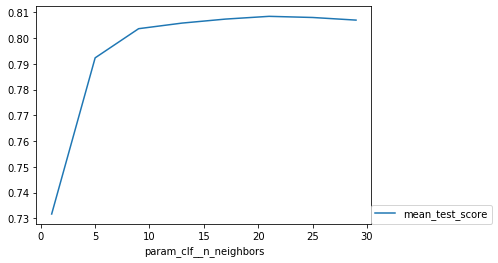

In [13]:
#Visualising n change impact
scores = pd.DataFrame(grid_knn_mm.cv_results_)
scores
scores.plot(x='param_clf__n_neighbors', y=['mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

We noticed that for the scaled data with MinMaxScaler, the accuracy is 0.8092 and the selected number of neighbours is 21.

In [14]:
print(classification_report(y_test, y_pred_knn_mm, labels=[0, 1], digits=6))

              precision    recall  f1-score   support

           0   0.826875  0.956374  0.886922      5868
           1   0.640954  0.280025  0.389765      1632

    accuracy                       0.809200      7500
   macro avg   0.733914  0.618199  0.638344      7500
weighted avg   0.786418  0.809200  0.778741      7500




Regarding precision, non default have a value of 0.826875 which can be considered relatively high. However, for the default customers, precision is lower with value 0.640954. The predictor predicts a larger number of points as belonging to class 0 and thereby achieves very high scores like precision for class 0 and very low scores for class 1.
The precision is slightly higher than scaled data using StandardScaler, meaning MinMaxScaler has better performance when it comes to predict true positives.

For recall (how many of the positive samples are captured by the positive predictions) and the f1-score, MinMaxScaler has a very similar performance to StandardScaler but again it performs better both for 0 and 1 classification. 


The accuracy of 0.8092 can be considered relatively high.
Compared to StandardScaler, the value is one more time higher, indicating better performance of KNN when scaling the data using MinMax.



In [15]:
confusion_matrix(y_test, y_pred_knn_mm)

array([[5612,  256],
       [1175,  457]])


The model using Stardard scaled data correctly predicts 5612 customers as non-default. The True Positives (Default customers) are much lower (457), confirming our statement above that the model does not perform well in predicting default customers.
The TP + TN are higher for MinMax rather than StandardScaler. 

### Unscaled data comparison

In [16]:
#Apply KnnClassifier without scaled data
param_grid_knn_us_n = {'n_neighbors':  np.arange(1, 30, 4)}
grid_knn_us_n = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn_us_n, cv=5)
grid_knn_us_n.fit(X_train, np.ravel(y_train,order='C'))
print(grid_knn_us_n.best_params_)
print(grid_knn_us_n.score(X_test, y_test))


{'n_neighbors': 29}
0.7814666666666666


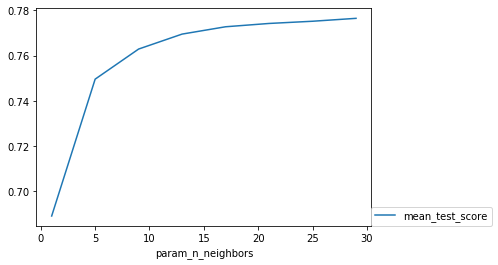

In [17]:
#Visualising n change impact
scores = pd.DataFrame(grid_knn_us_n.cv_results_)
scores
scores.plot(x='param_n_neighbors', y=['mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

In [18]:
y_pred_us_n = grid_knn_us_n.predict(X_test)

print(classification_report(y_test, y_pred_us_n, labels=[0, 1], digits=6))

              precision    recall  f1-score   support

           0   0.794786  0.971541  0.874319      5868
           1   0.489297  0.098039  0.163349      1632

    accuracy                       0.781467      7500
   macro avg   0.642041  0.534790  0.518834      7500
weighted avg   0.728312  0.781467  0.719612      7500



The accuracy for unscaled data is the lowest among the 3 different analysis. Same can be said regardin precision and the f1-score.

In [19]:
confusion_matrix(y_test, y_pred_us_n)

array([[5701,  167],
       [1472,  160]])

From the confusion matrix, we can see that the uscaled data do a very good job for calculating True Positives (highest among all).
However, the performance significantly drops for True Negatives (default values).
The TP + TN is lower than MinMax and StandardScaler, suggesting that we should scale our data before processing with the analysis.

In summary, using scaled data resulted in a higher accuracy compared to using non-scaled data for KNN. This was also true for precision and for f1-scores.  MinMaxScaler perfomed better among the scaling methods, surpassing StandardScaler for the metrices analyzed.
We can conclude that scaling features result in a better predicting model. 

### LogisticRegression


Logistic Regression is a common linear classification algorithm. By default it applies L2 regularization, which tries to reduce the chance of model overfitting. For Logistic Regression the trade-off parameter that determines the strength of regularization is the C parameter. Higher values of C correspond to less regularization, and viceversa.

#### StandardScaler

We istantiate the Pipeline class directly by passing a list of of tuples, where the tuple is the name of the scaler and the estimator.

We then try to find the optimal C value for which we will have the optimal level of regularization. We perform GridSearchCV using the Pipeline. Using pipelines make sure that there is no information leaking. To iterate over sufficient number of parameters, while controlling for runtime the parameters 1,2,6 were chosen. CV = 5 was chosen as higher CV did not change search results (runtime optimization). The model is fit on the training data only. After this, some print statements allow us to see the optimal C as well as performance measures that will be analysed below. 

In [20]:
logreg_pipe_ss = Pipeline([
    ('StandardScaler', StandardScaler()),
    ('clf', LogisticRegression())])

param_grid_logreg_ss = {'clf__C': np.linspace(1, 2, 6)}
grid_logreg_ss = GridSearchCV(logreg_pipe_ss, param_grid_logreg_ss, cv=5)

grid_logreg_ss.fit(X_train, y_train)
print(grid_logreg_ss.best_params_)
print(grid_logreg_ss.score(X_test, y_test))
y_pred_logreg_ss = grid_logreg_ss.predict(X_test)

print(classification_report(y_test, y_pred_logreg_ss, labels=[0, 1], digits=6))
confusion_matrix(y_test, y_pred_logreg_ss)

{'clf__C': 1.0}
0.8164
              precision    recall  f1-score   support

           0   0.821383  0.978016  0.892882      5868
           1   0.748538  0.235294  0.358042      1632

    accuracy                       0.816400      7500
   macro avg   0.784960  0.606655  0.625462      7500
weighted avg   0.805532  0.816400  0.776501      7500



array([[5739,  129],
       [1248,  384]])

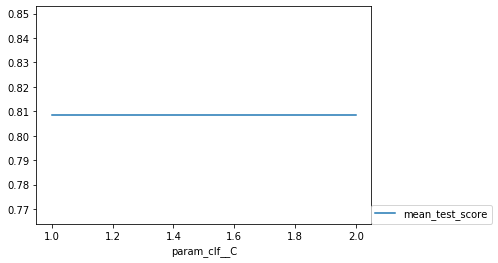

In [21]:
#Visualising C change impact
scores = pd.DataFrame(grid_logreg_ss.cv_results_)
scores
scores.plot(x='param_clf__C', y=['mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

For StandardScaler, it can be observed that precision, recall and f1-score have high performance when it comes to predicting non-default customers - 0.

When it comes to prediction of defualted customers - 1, the performance scores are not satisfactory. Pecision score is the highest, with a value of 0.748538 - this means that the most values that the model predicted as positive are actually positive. Or in other words there were significantly more true positive values than false positive. Recall, on the other hand, measures how many of the positive samples are captured by the positive predictions. Here, the score is 0.235294, which is very low indicating that there were much more values to be classified in this category than were actually classified. There is a trade-off between precision and recall values (few false positives but a lot of false negatives), f-score provides a harmonic mean of precision and recall. The score is 0.358042, that is again very low which supports the intuition that the model has very weak performance on this category.

The accuracy value of 0.8164 looks relatively high meaning that Logistic Regression with StandardScaler performs well in predicting whether the customer defaulted or not. The reason for this is that the majority of data points in the data set are in the 0 - non-default category, so even though the model does a mediocre job at predicting default the overall performance which combines the performace for the prediction of both classes remains high.

This can be seen in the macro and weighted avg scores - the first which returns the average without considering the proportion of each class in the dataset has lower scores than the weighted average which accounts for the proportion for each label in the dataset.

Based on the confusion matrix we can say that the Logistic Regression with Stardard scaled data correctly predicts 5739 customers as non-default. The correct predictions for default customers are much lower, only 384, there are a lot of false negatives which confirms our intuition that the model doesn't do well in predicting default.

#### MinMaxScaler

Again, a pipeline is instantieted directly by passing a list of of tuples. max_iter = 1000 is the maximum number of iterations taken for the solvers to converge, and 1000 was chosen for runtime and results optimization. The other relevant parameters are the same as for the StandardScaler.

In [22]:
logreg_pipe_mm = Pipeline([
    ('MinMaxScaler', MinMaxScaler()),
    ('clf', LogisticRegression(max_iter=1000))])

param_grid_logreg_mm = {'clf__C': np.linspace(1, 2, 6)}
grid_logreg_mm = GridSearchCV(logreg_pipe_mm, param_grid_logreg_mm, cv=5)

grid_logreg_mm.fit(X_train, y_train)
print(grid_logreg_mm.best_params_)
print(grid_logreg_mm.score(X_test, y_test))
y_pred_logreg_mm = grid_logreg_mm.predict(X_test)

print(classification_report(y_test, y_pred_logreg_mm, labels=[0, 1], digits=6))
confusion_matrix(y_test, y_pred_logreg_mm)

{'clf__C': 2.0}
0.8148
              precision    recall  f1-score   support

           0   0.819427  0.979039  0.892150      5868
           1   0.748466  0.224265  0.345120      1632

    accuracy                       0.814800      7500
   macro avg   0.783946  0.601652  0.618635      7500
weighted avg   0.803986  0.814800  0.773116      7500



array([[5745,  123],
       [1266,  366]])

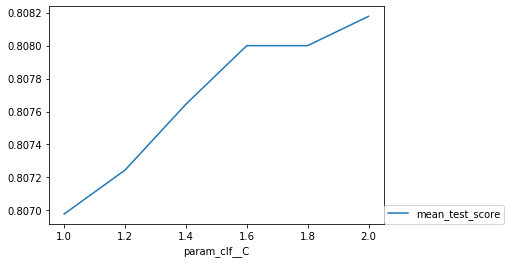

In [23]:
#Visualising C change impact
scores = pd.DataFrame(grid_logreg_mm.cv_results_)
scores
scores.plot(x='param_clf__C', y=['mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

For MinmaxScaler, it can again be observed that precision, recall and f1-score have high performance when it comes to predicting non-default customers - 0. With recall being almost a perfect score of 1 - almost all customers who were in the non-default category were assigned to that category.

When it comes to prediction of defualted customers - 1 the performance scores are very low. Precision score is again the highest, with a value of 0.748466 - so most values that the model predicted as positive for this category are actually positive. Or in other words there were significantly more true positive values than false positive -more correct predicitions. Recall score is 0.224265, which is very low which suggests that there were much more values to be classified in this category than were actually classified. The f score is 0.345120, which very low which supports the intuition that the model has very weak performance on assigning customers to this default category.

The accuracy value of 0.8148 is high meaning that the Logistic Regression with MinMaxScaler has an overall good performance in predicting whether the customer defaulted or not. This score is marginally lower than we saw with the StandardScaler for this model. 

The differences between macro and weighted avg scores show us the performance variation which occurs if we consider the proportion of each class in the dataset. As we can see, due to the imbalance in the data the model has better scores if we take into account the proportions of the datapoints in each class. 

Based on the confusion matrix we can say that the Logistic Regression with MinMax scaled data correctly predicts 5745 customers as non-default slightly more than Standard Scaler (5739). The correct predictions for default customers is only 366, that is 18 fewer than in the StandardScaler. Once again there are a lot of false negatives which confirms our intuition that the model doesn't do well in predicting default.

### Unscaled data comparison

In [24]:
#Apply logreg without scaled data

param_grid_logreg_us = {'C': np.linspace(1, 2, 6)}
grid_logreg_us = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logreg_us, cv=5)

grid_logreg_us.fit(X_train,  np.ravel(y_train,order='C'))
print(grid_logreg_us.best_params_)
print(grid_logreg_us.score(X_test, y_test))

{'C': 1.0}
0.7825333333333333


In [25]:

y_pred_logreg_us = grid_logreg_us.predict(X_test)

print(classification_report(y_test, y_pred_logreg_us, labels=[0, 1], digits=6))
confusion_matrix(y_test, y_pred_logreg_us)

              precision    recall  f1-score   support

           0   0.782504  1.000000  0.877983      5868
           1   1.000000  0.000613  0.001225      1632

    accuracy                       0.782533      7500
   macro avg   0.891252  0.500306  0.439604      7500
weighted avg   0.829831  0.782533  0.687200      7500



array([[5868,    0],
       [1631,    1]])

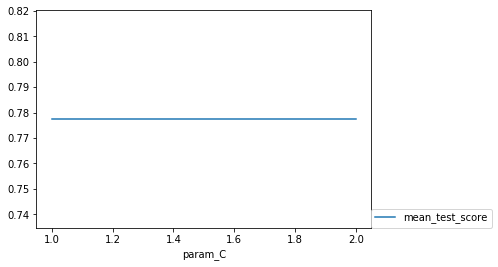

In [26]:
#Visualising C change impact
scores = pd.DataFrame(grid_logreg_us.cv_results_)
scores
scores.plot(x='param_C', y=['mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

For both scaling models, the value of C is quite low (1.0),(2.0). Low C mean higher regularization, which means we are dealing with a simpler model, reducing the risk of overfitting as we limit the influence of individual points. Regarding the perfomance of LogReg, StandardScaler performs best, followed by MinMaxScaler and finally non-scaled data.
The effect of scaling the data is quite significant on the performance of the model.


## LinearSVC

The goal of a Linear SVC (support vector classifier) is to separate classes using a linear hyperplane with the largest amount of margin. The hyper plane chosen has maximum margin (segregation) from the either nearest data points (support vectors). 

In [29]:
#Pipeline for LinearSVC using StandardScaler() dual = False is used to prevent convergence error

svc_pipe_ss = Pipeline([
    ('StandardScaler', StandardScaler()),
    ('clf', LinearSVC(max_iter=1000, dual = False))]) 

param_grid_svc_ss = {'clf__C': np.linspace(1, 2, 6)}
grid_svc_ss = GridSearchCV(svc_pipe_ss, param_grid_svc_ss, cv=5)

grid_svc_ss.fit(X_train, y_train)
print(grid_svc_ss.best_params_)
print(grid_svc_ss.score(X_test, y_test))
y_pred_svc_ss = grid_svc_ss.predict(X_test)

print(classification_report(y_test, y_pred_svc_ss, labels=[0, 1], digits=6))
confusion_matrix(y_test, y_pred_svc_ss)

{'clf__C': 1.0}
0.8057333333333333
              precision    recall  f1-score   support

           0   0.808246  0.985515  0.888121      5868
           1   0.753623  0.159314  0.263025      1632

    accuracy                       0.805733      7500
   macro avg   0.780935  0.572414  0.575573      7500
weighted avg   0.796360  0.805733  0.752100      7500



array([[5783,   85],
       [1372,  260]])

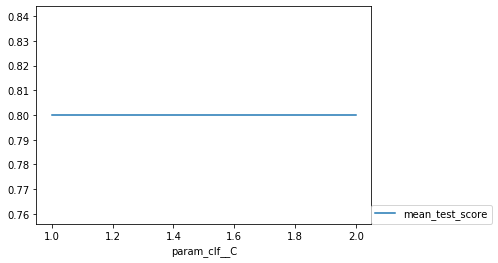

In [30]:
#Visualising C change impact
scores = pd.DataFrame(grid_svc_ss.cv_results_)
scores
scores.plot(x='param_clf__C', y=['mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

For StandardScaler, it can be observed that precision, recall and f1-score have high performance when it comes to predicting non-default customers - 0. 
When it comes to prediction of defualted customers - 1 the performance scores are not satisfactory. Pecision score has a value of 0.753623 - this means that the most values that the model predicted as positive are actually positive. Or in other words there were significantly more true positive values than false positive. Recall, on the other hand, measures how many of the positive samples are captured by the positive predictions. Here, the score is very low for category 1 which indicates that there were much more values to be classified in this category than were actually classified. There is a trade-off between precision and recall values (few false positives but a lot of false negatives), f-score provides a harmonic mean of precision and recall. The score is very low which supports the intuition that the model has very weak performance on this category.

The accuracy value of 0.805733 looks relatively high meaning that the LinearSVC with StandardScaler performs well in predicting whether the customer defaulted or not. The reason for this is that the majority of data points in the data set are in the 0 - non-default category, so even though the model does a mediocre job at predicting default the overall performance which combines the performace for the prediction of both classes remains high.

This can be seen in the macro and weighted avg scores - the first which returns the average without considering the proportion of each class in the dataset has lower scores than the weighted average which accounts for the proportion for each label in the dataset.

Based on the confusion matrix we can say that the Linear SVC with Stardard scaled data correctly predicts 5783 customers as non-default. The correct predictions for default customers are much lower only 260, there are a lot of false negatives which confirms our intuition that the model doesn't do well in predicting default.


In [31]:
#Pipeline for LinearSVC using MinMaxScaler()

svc_pipe_mm = Pipeline([
    ('MinMaxScaler', MinMaxScaler()),
    ('clf', LinearSVC(max_iter=1000, dual=False))])

param_grid_svc_mm = {'clf__C': np.linspace(1, 2, 6)}
grid_svc_mm = GridSearchCV(svc_pipe_mm, param_grid_svc_mm, cv=5)

grid_svc_mm.fit(X_train, y_train)
print(grid_svc_mm.best_params_)
print(grid_svc_mm.score(X_test, y_test))
y_pred_svc_mm = grid_svc_mm.predict(X_test)

print(classification_report(y_test, y_pred_svc_mm, labels=[0, 1], digits=6))
confusion_matrix(y_test, y_pred_svc_mm)

{'clf__C': 2.0}
0.8057333333333333
              precision    recall  f1-score   support

           0   0.808246  0.985515  0.888121      5868
           1   0.753623  0.159314  0.263025      1632

    accuracy                       0.805733      7500
   macro avg   0.780935  0.572414  0.575573      7500
weighted avg   0.796360  0.805733  0.752100      7500



array([[5783,   85],
       [1372,  260]])

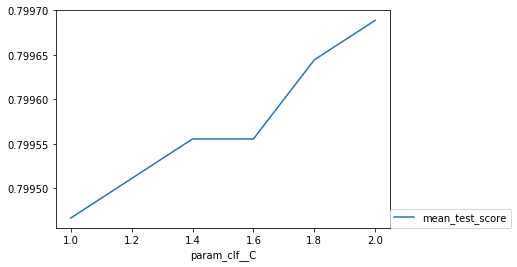

In [32]:
#Visualising C change impact
scores = pd.DataFrame(grid_svc_mm.cv_results_)
scores
scores.plot(x='param_clf__C', y=['mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

For MinmaxScaler, it can again be observed that precision, recall and f1-score have high performance when it comes to predicting non-default customers - 0. With recall being almost a perfect score of 1 - almost all customers who were in the non-default category were assigned to that category.

When it comes to prediction of defualted customers - 1 the performance scores are very low. Precision score has again a value of 0.753663 - so most values that the model predicted as positive for this category are actually positive. Or in other words there were significantly more true positive values than false positive -more correct predicitions. Recall score for category 1 is very low which suggests that there were much more values to be classified in this category than were actually classified. The f score is very low which supports the intuition that the model has very weak performance on assigning customers to this default category.

The accuracy value of 0.805733 is high meaning that the LinearSVC with MinMaxScaler has an overall good performance in predicting whether the customer defaulted or not. This score is equivalent to the score than we saw with the StandardScaler for this model. 

The differences between macro and weighted avg scores show us the performance variation which occurs if we consider the proportion of each class in the dataset. As we can see, due to the imbalance in the data the model has better scores if we take into account the proportions of the datapoints in each class. 

Based on the confusion matrix we can say that the Linear SVC with MinMax scaled data correctly predicts 5783 customers as non-default. The correct predictions for default customers is only 260 same as in StandardScaler. Once again there are a lot of false negatives which confirms our intuition that the model doesn't do well in predicting default, possibly due to imbalance of data..

In [36]:
param_grid_svc_us = {'C': np.linspace(1, 2, 6)}
grid_svc_us = GridSearchCV(LinearSVC(max_iter=1000, dual=False), param_grid_svc_us, cv=5)

grid_svc_us.fit(X_train,  np.ravel(y_train,order='C'))
print(grid_svc_us.best_params_)
print(grid_svc_us.score(X_test, y_test))

{'C': 1.6}
0.7824


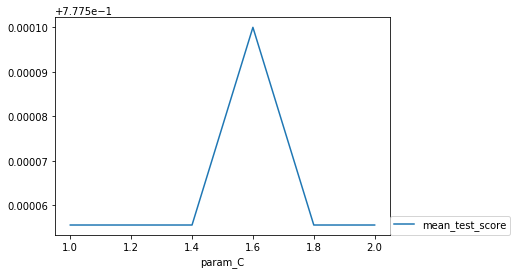

In [37]:
scores = pd.DataFrame(grid_svc_us.cv_results_)
scores
scores.plot(x='param_C', y=['mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

In [38]:
y_pred_svc_us = grid_svc_us.predict(X_test)

print(classification_report(y_test, y_pred_svc_us, labels=[0, 1], digits=6))
confusion_matrix(y_test, y_pred_svc_us)

              precision    recall  f1-score   support

           0   0.782400  1.000000  0.877917      5868
           1   0.000000  0.000000  0.000000      1632

    accuracy                       0.782400      7500
   macro avg   0.391200  0.500000  0.438959      7500
weighted avg   0.612150  0.782400  0.686883      7500



/Users/Daniel/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[5868,    0],
       [1632,    0]])

For Linear SVC without scaled data we can see that precision, recall and f1-score still have high performance when it comes to predicting non-default customers - 0, although recall is a bit higher than in the case of scaled data. 

When it comes to prediction of defualted customers - 1 the performance scores are extremely low, much lower than with scaled data. Both precision and recall for category 1 are equal to 0.00 indicating that unscaled model predicts all customers to the majority category of 0.

The accuracy value of 0.782400 is nonetheless still relatively high but lower than in scaled cases, but this is due majority of group belonging to category 0. 

The macro and weighted avg scores show us the performance variation which occurs if we consider the proportion of each class in the dataset. On both levels the scores are lower than with the scaled data, but similarly to what was seen before the model has better scores if we take into account the proportions of the datapoints in each class.

Based on the confusion matrix we can say that the Linear SVC with unscaled data correctly classifies 5868 customers as non-defaulting but this is due imbalanced daata.


The optimal value of C for all Linear SVC models was quite low at 2.0, which means higher regularization and that a higher margin hyperplane was chosen even if some of the data points were misclassified. Each data point had a lower impact on the final hyperplane. If the value of C was high then the model would fit a smaller margin hyperplane if that meant that more of the data points would be classified correctly.
Overall, we can conclude that scaling the data helped improve the overall accuracy of the model, by improving the accuracy predictions for default customers.

# Final Summary

Finally, we can say that in all classification models scaling improved accuracy levels. Out of all the models Logistic regression with Standard Scaler produced the highest accuracy of predictions with a score of 0.8164.